## 1. Loading Data and Libraries

In this section, we load the necessary libraries and data for each of the TV series: Friends, HIMYM and TBBT

In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.cm as cm
import numpy as np


combined_data = pd.read_csv('FINAL_combined_data.csv')
friends_ngrams = pd.read_csv('FINAL_Friends_ngrams.csv')
himym_ngrams = pd.read_csv('FINAL_HIMYM_ngrams.csv')
tbbt_ngrams = pd.read_csv('FINAL_TBBT_ngrams.csv')
friends_phrases = pd.read_csv('FINAL_Friends_specific_phrases.csv')
himym_phrases = pd.read_csv('FINAL_HIMYM_specific_phrases.csv')
tbbt_phrases = pd.read_csv('FINAL_TBBT_specific_phrases.csv')

## 2. Mentions Heatmaps

This analysis generates heatmaps showing how often different characters mention other characters across each TV series. We also account for nicknames of the main characters, if provided.

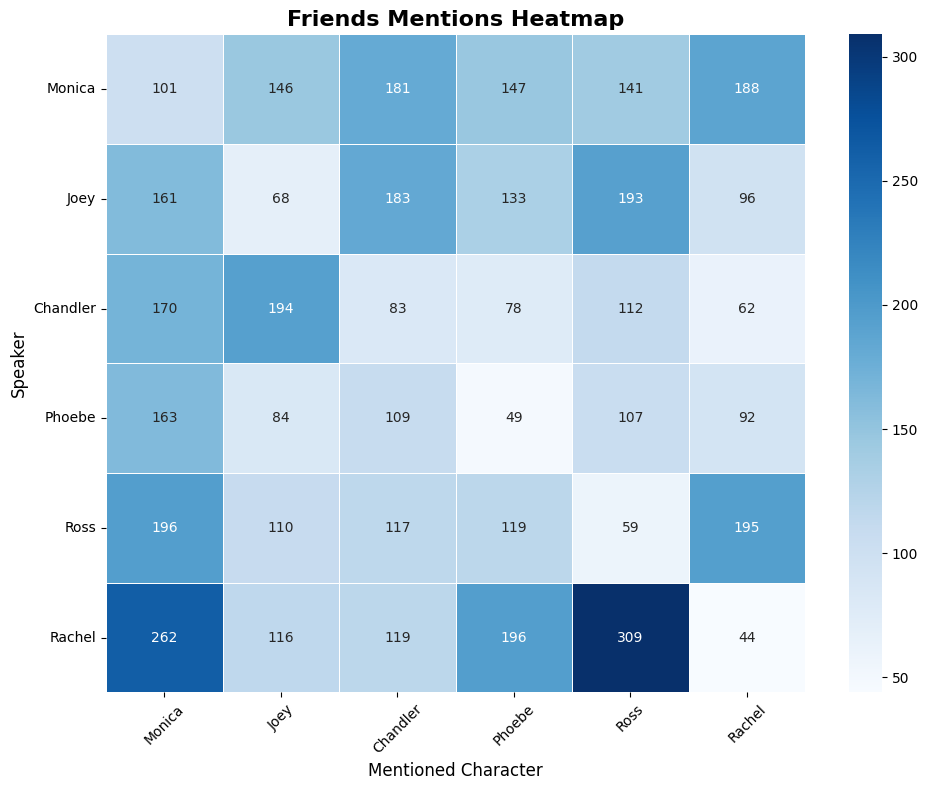

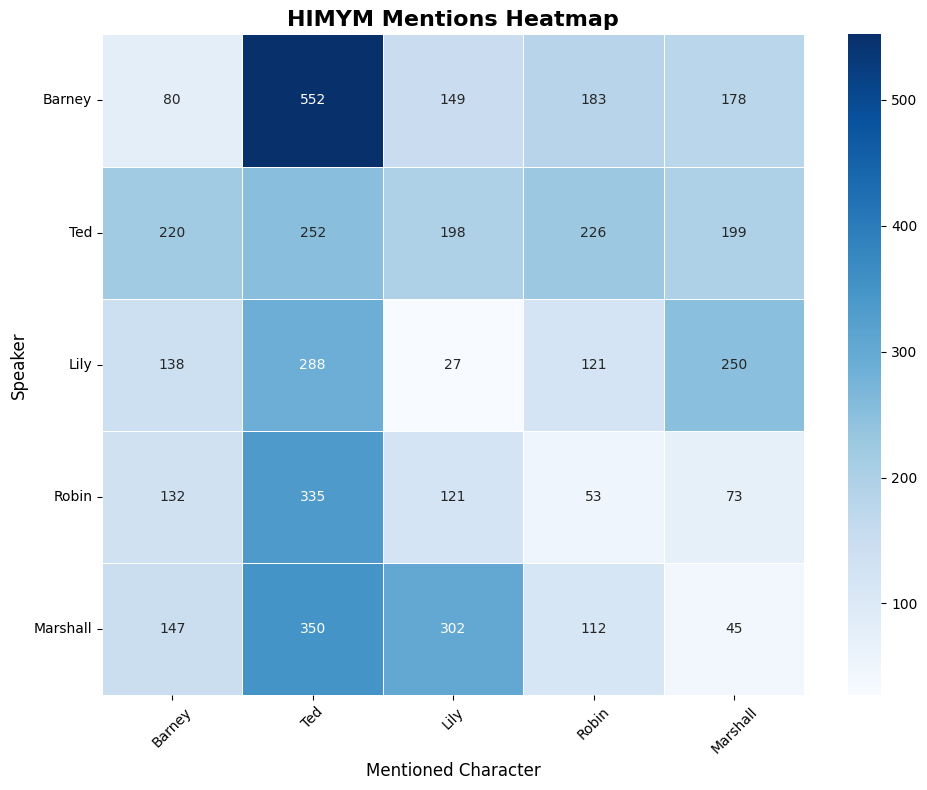

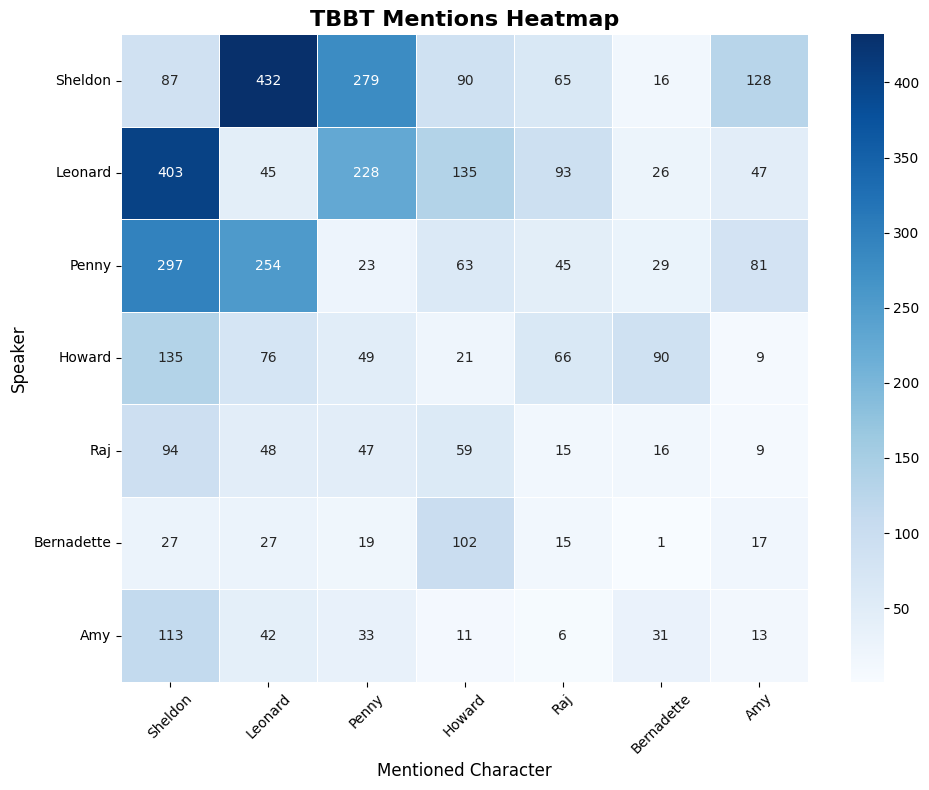

In [36]:

nickname_mapping = {
    "Friends": {
        "Monica": ["Mon"],
        "Joey": ["Joe"],
        "Chandler": ["Chan"],
        "Phoebe": ["Phee", "Phoe"],
        "Rachel": ["Rach"]
    },
    "HIMYM": {
        "Lily": ["Lil"]
    },
    "TBBT": {
        "Sheldon": ["Shelly"],
        "Howard": ["Howie"],
        "Bernadette": ["Bernie"]
    }
}


def create_mention_matrix_with_nicknames(data, series_name):
    characters = data['character'].unique()
    mention_matrix = pd.DataFrame(0, index=characters, columns=characters)
    
    nicknames = nickname_mapping.get(series_name, {})
    
    for _, row in data.iterrows():
        speaker = row['character']
        line = str(row['line']).lower()
        
        for mentioned in characters:
            mentions_to_check = [mentioned.lower()] + [
                nickname.lower() for nickname in nicknames.get(mentioned, [])
            ]
            
            if any(mention in line for mention in mentions_to_check):
                mention_matrix.loc[speaker, mentioned] += 1
    
    return mention_matrix


series_data = combined_data.groupby('series')


for series_name, series_df in series_data:
    mention_matrix = create_mention_matrix_with_nicknames(series_df, series_name)
    

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        mention_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=True,
        linewidths=.5
    )
    plt.title(f"{series_name} Mentions Heatmap", fontsize=16, fontweight='bold')
    plt.xlabel("Mentioned Character", fontsize=12)
    plt.ylabel("Speaker", fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# 3. WordCloud for Trigrams

We generate wordclouds for trigrams of each series to visualize the most common word combinations.

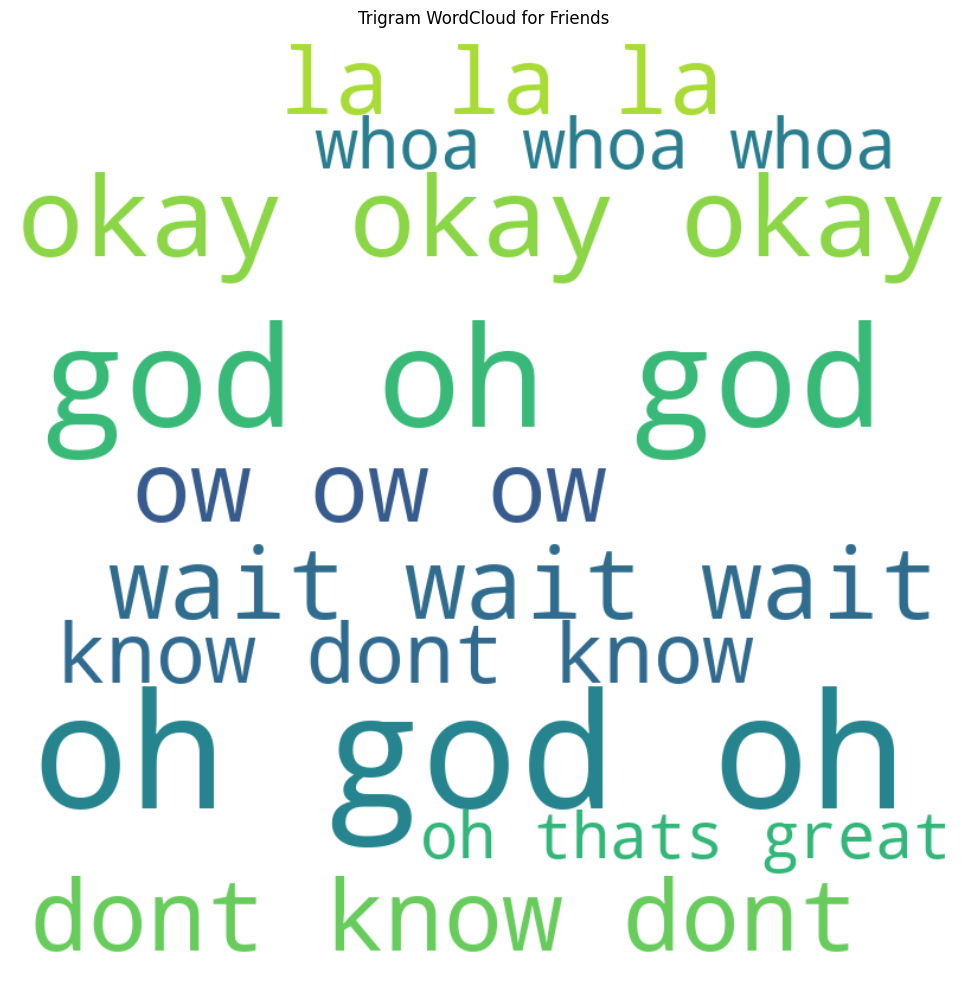

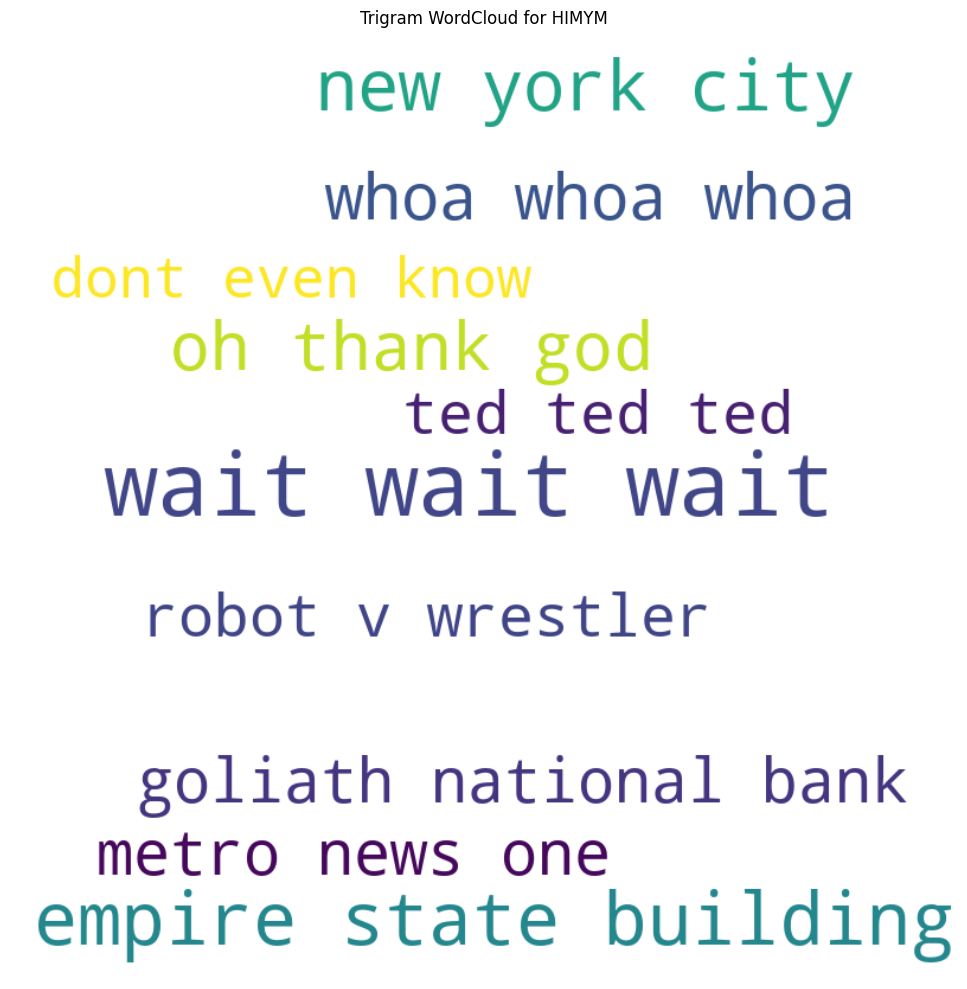

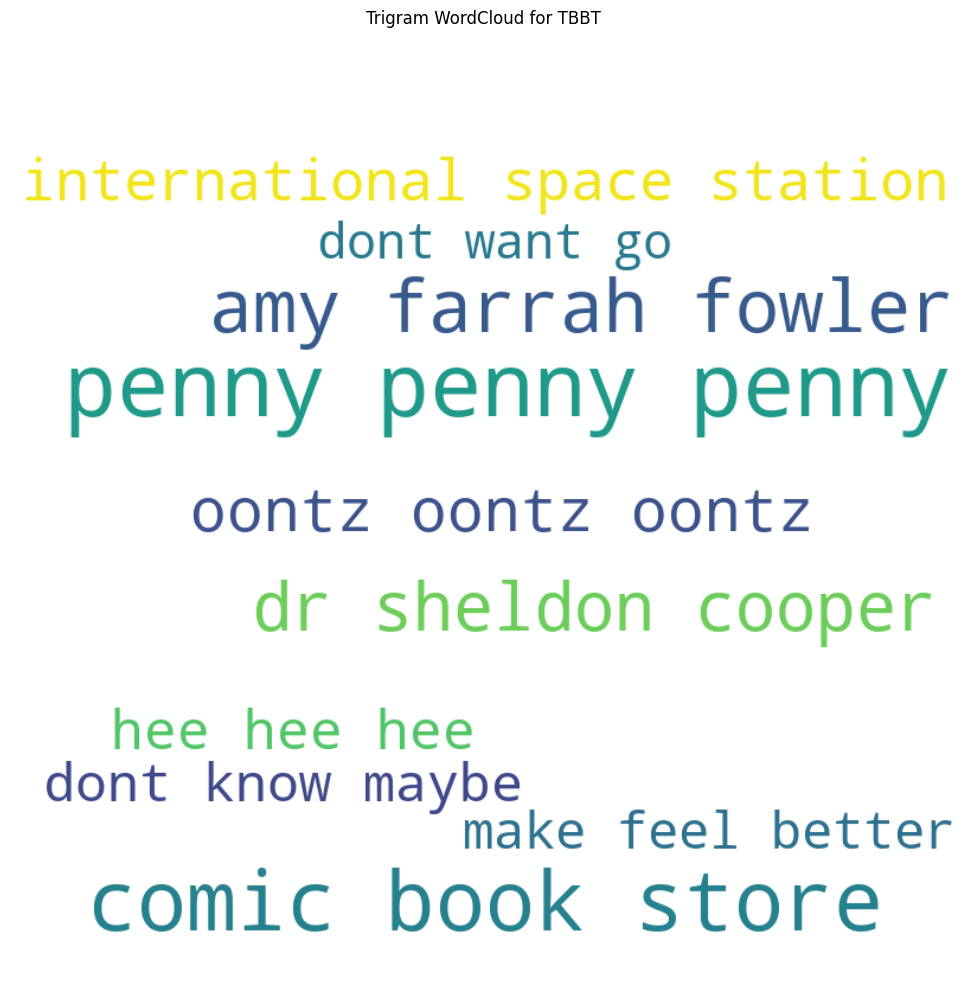

In [37]:

def generate_wordcloud_with_shape(data, series_name, shape="circle"):
    data_trigrams = data[data['ngram_type'] == '3-gram']
    
    trigram_freq = dict(zip(data_trigrams['ngram'], data_trigrams['count']))
    
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color='white',
        stopwords=STOPWORDS,
        mask=None,
        contour_width=3,
        contour_color='steelblue'
    ).generate_from_frequencies(trigram_freq)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Trigram WordCloud for {series_name}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

series_ngrams = {
    "Friends": friends_ngrams,
    "HIMYM": himym_ngrams,
    "TBBT": tbbt_ngrams
}

for series_name, data in series_ngrams.items():
    generate_wordcloud_with_shape(data, series_name, shape="circle")


## 4. WordCloud for Specific Phrases

This analysis generates wordclouds for specific phrases in each series, where colors differentiate the series.

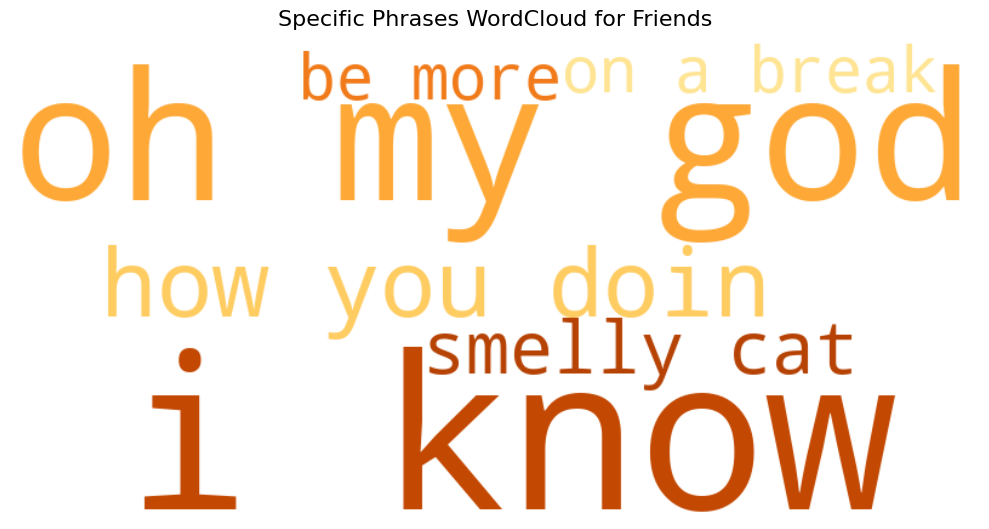

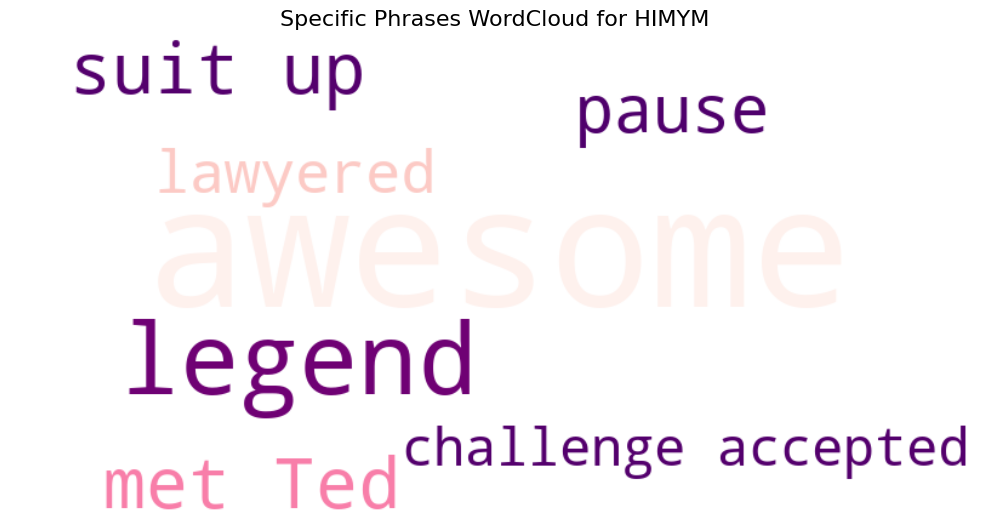

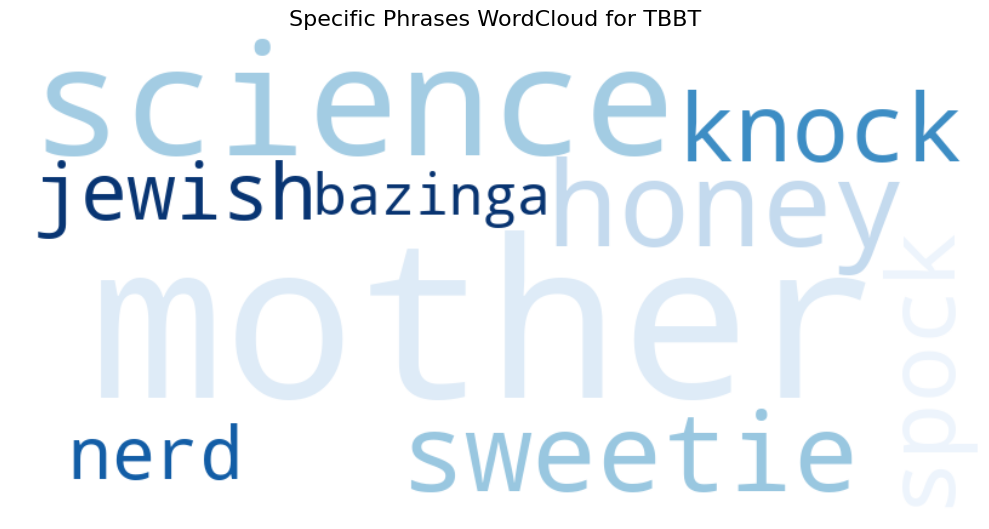

In [38]:

def generate_colored_wordcloud(data, series_name, color):
    phrase_freq = dict(zip(data['phrase'], data['total']))
    
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color
    ).generate_from_frequencies(phrase_freq)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Specific Phrases WordCloud for {series_name}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

color_map = {
    "Friends": "YlOrBr",
    "HIMYM": "RdPu",
    "TBBT": "Blues"
}

series_phrases = {
    "Friends": friends_phrases,
    "HIMYM": himym_phrases,
    "TBBT": tbbt_phrases
}

for series_name, data in series_phrases.items():
    generate_colored_wordcloud(data, series_name, color_map[series_name])


## 5. Combined WordCloud for Specific Phrases

This analysis generates a combined wordcloud for all series, showcasing the most frequent specific phrases used across Friends, HIMYM and TBBT.

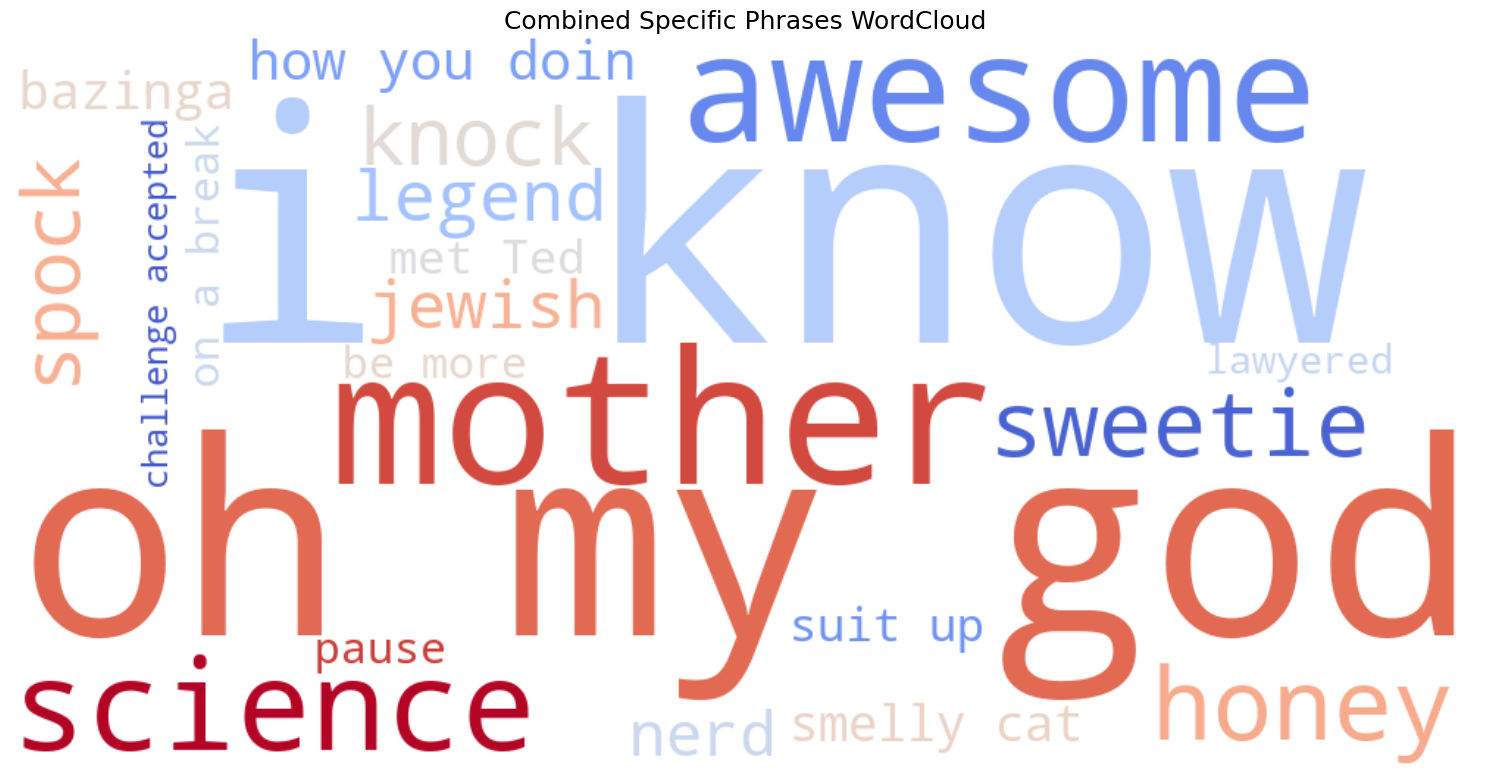

In [39]:
def generate_combined_wordcloud(series_data, title, color):
    combined_phrases = pd.concat(series_data.values(), ignore_index=True)
    
    aggregated_phrases = combined_phrases.groupby('phrase', as_index=False)['total'].sum()
    
    phrase_freq = dict(zip(aggregated_phrases['phrase'], aggregated_phrases['total']))
    
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap=color
    ).generate_from_frequencies(phrase_freq)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

generate_combined_wordcloud(
    series_phrases, 
    "Combined Specific Phrases WordCloud", 
    "coolwarm"  
)


## 6. Combined WordCloud for Trigrams

This analysis generates a combined wordcloud for all series' trigrams, showcasing the most frequent trigram combinations used across the series.

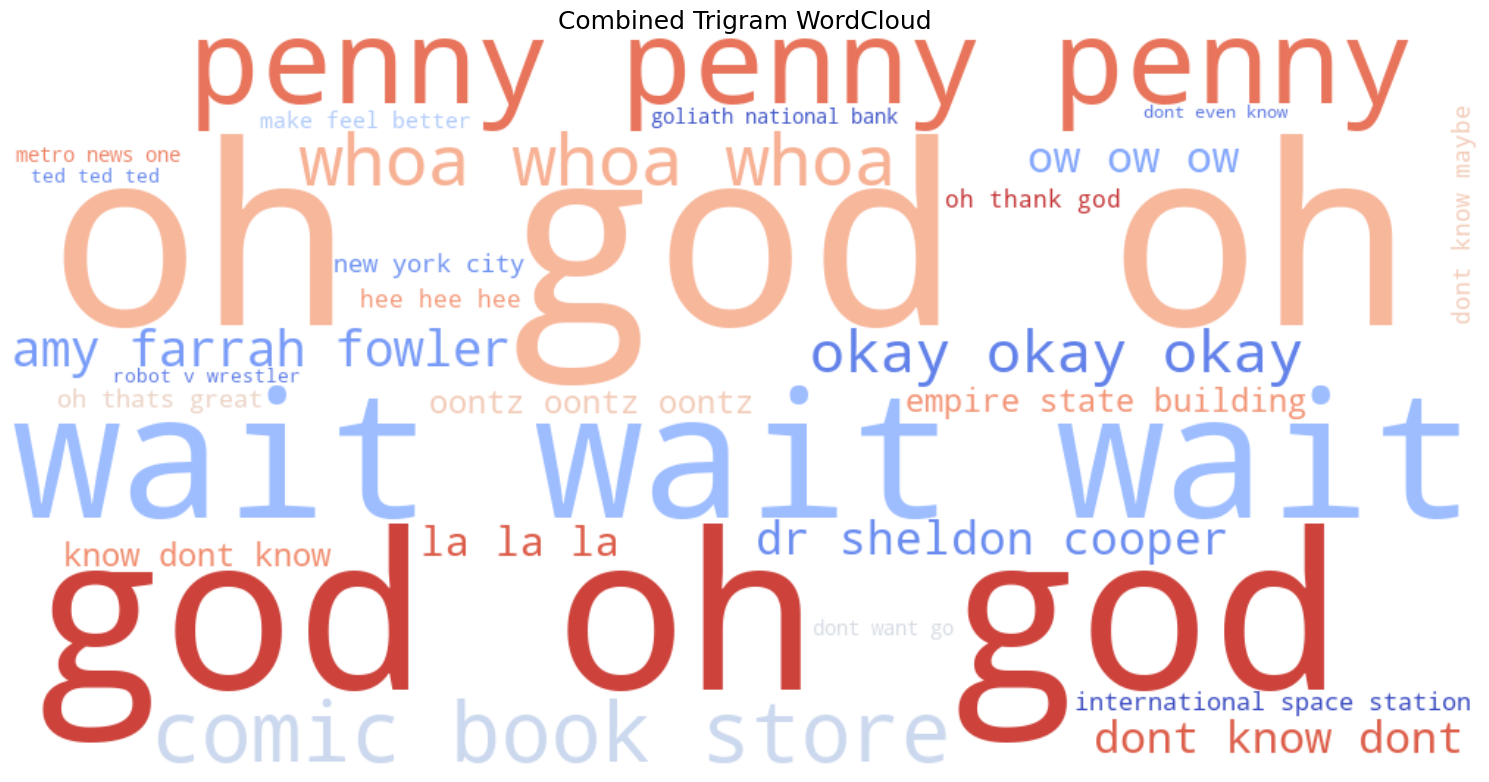

In [40]:
def generate_combined_trigram_wordcloud(series_data, title, color):
    combined_ngrams = pd.concat(series_data.values(), ignore_index=True)
    
    combined_trigrams = combined_ngrams[combined_ngrams['ngram_type'] == '3-gram']
    
    aggregated_trigrams = combined_trigrams.groupby('ngram', as_index=False)['count'].sum()

    trigram_freq = dict(zip(aggregated_trigrams['ngram'], aggregated_trigrams['count']))
    

    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap=color
    ).generate_from_frequencies(trigram_freq)

    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

generate_combined_trigram_wordcloud(
    series_ngrams, 
    "Combined Trigram WordCloud", 
    "coolwarm" 
)


## 7. Plotting Iconic Phrases in Friends, HIMYM, and TBBT

This section compares iconic phrases from each series, such as "How you doin'?" and "We were on a break!" from Friends, "Suit up!" from HIMYM, and "Sweetie" from TBBT. We will visualize the usage frequency of each phrase using bar charts.

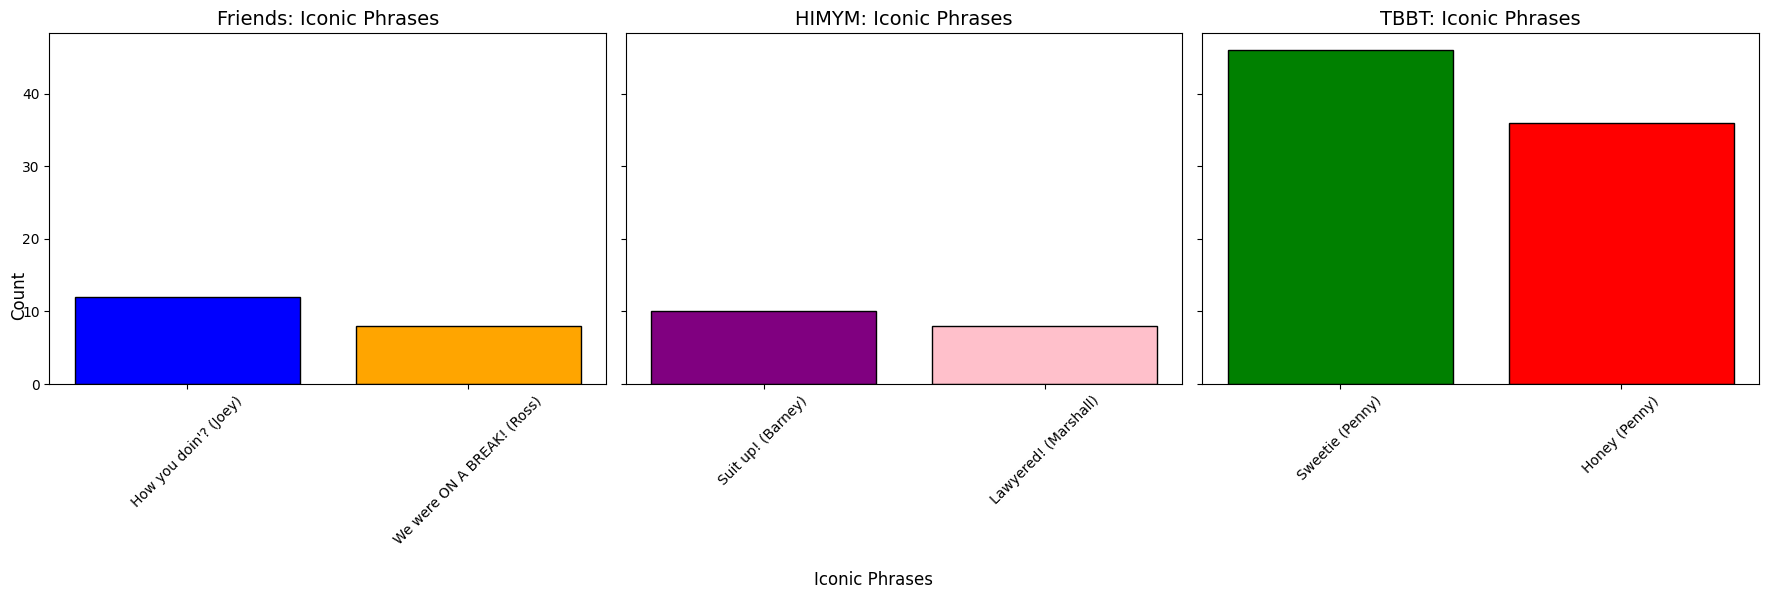

In [41]:
friends_counts = {
    "How you doin'? (Joey)": friends_phrases[friends_phrases['phrase'] == "how you doin"]['Joey'].sum(),
    "We were ON A BREAK! (Ross)": friends_phrases[friends_phrases['phrase'] == "on a break"]['Ross'].sum()
}

himym_counts = {
    "Suit up! (Barney)": himym_phrases[himym_phrases['phrase'] == "suit up"]['Barney'].sum(),
    "Lawyered! (Marshall)": himym_phrases[himym_phrases['phrase'] == "lawyered"]['Marshall'].sum()
}

tbbt_counts = {
    "Sweetie (Penny)": tbbt_phrases[tbbt_phrases['phrase'] == "sweetie"]['Penny'].sum(),
    "Honey (Penny)": tbbt_phrases[tbbt_phrases['phrase'] == "honey"]['Penny'].sum()
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


axes[0].bar(friends_counts.keys(), friends_counts.values(), color=['blue', 'orange'], edgecolor='black')
axes[0].set_title("Friends: Iconic Phrases", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(himym_counts.keys(), himym_counts.values(), color=['purple', 'pink'], edgecolor='black')
axes[1].set_title("HIMYM: Iconic Phrases", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(tbbt_counts.keys(), tbbt_counts.values(), color=['green', 'red'], edgecolor='black')
axes[2].set_title("TBBT: Iconic Phrases", fontsize=14)
axes[2].tick_params(axis='x', rotation=45)

fig.supylabel("Count", fontsize=12)
fig.supxlabel("Iconic Phrases", fontsize=12)
plt.tight_layout()
plt.show()


## 8. Seasonal Trends for Specific Phrases

Here, we explore how certain phrases ("Legendary!", "Bazinga!" and "Smelly cat") are used over time, based on seasons. This is shown as a line chart with seasonal trends.

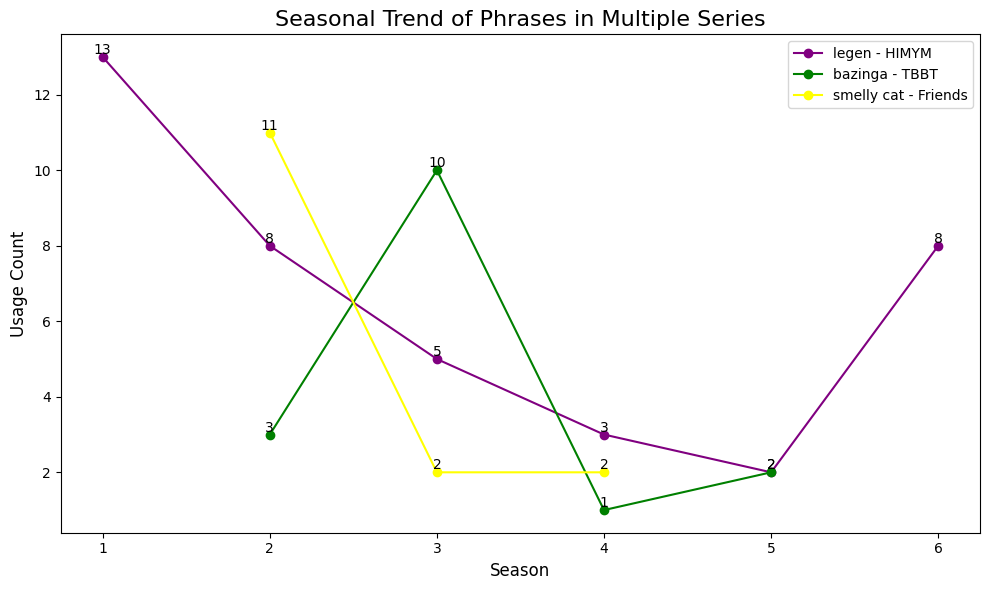

In [42]:

def visualize_seasonal_trends_from_lines_multiple(data, phrases, series_names, colors):
    plt.figure(figsize=(10, 6))
    
    for phrase, series_name, color in zip(phrases, series_names, colors):
        phrase_data = data[data['line'].str.contains(phrase, case=False, na=False)]
        
        if not phrase_data.empty:
            seasonal_trends = phrase_data.groupby('season').size()
            plt.plot(seasonal_trends.index, seasonal_trends.values, marker='o', color=color, label=f"{phrase} - {series_name}")
            
            for season, count in zip(seasonal_trends.index, seasonal_trends.values):
                plt.text(season, count, str(int(count)), ha='center', va='bottom', fontsize=10)


    plt.title('Seasonal Trend of Phrases in Multiple Series', fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Usage Count', fontsize=12)
    plt.xticks(range(1, 7)) 
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_seasonal_trends_from_lines_multiple(
    combined_data[combined_data['series'].isin(['HIMYM', 'TBBT', 'Friends'])],
    ['legen', 'bazinga', 'smelly cat'],
    ['HIMYM', 'TBBT', 'Friends'],
    ['purple', 'green', 'yellow']
)


## 9. Top 5 Characters by Average Words per Season

This section visualizes the top 5 characters with the highest average words per episode for each season across the TV series.


C:\Users\sedra\AppData\Local\Temp\ipykernel_17156\865631800.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(unique_characters))


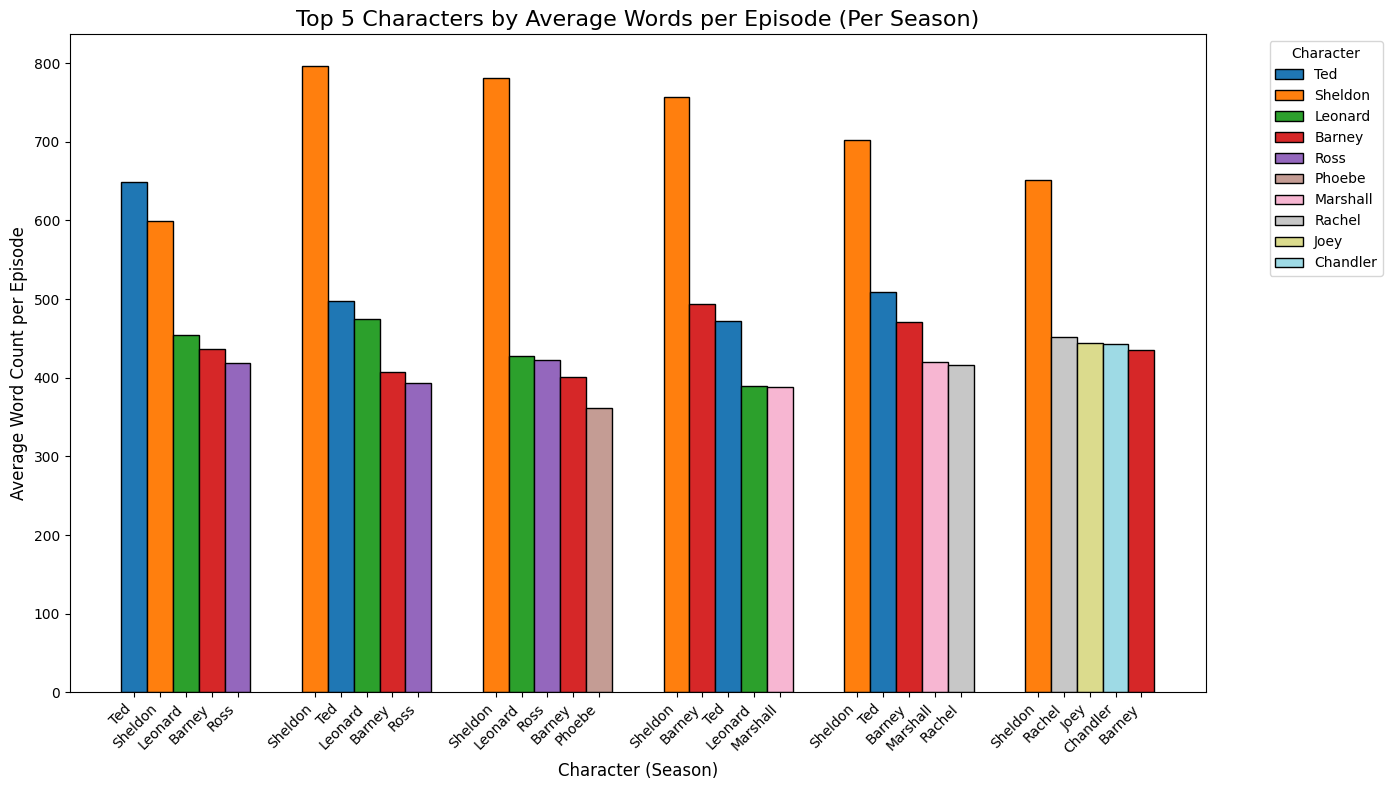

In [43]:

def analyze_top5_words_per_season(data):
    data['line_length'] = data['clean_line'].apply(lambda x: len(str(x).split()))
    
    words_per_season = data.groupby(['season', 'character', 'series'])['line_length'].sum().reset_index()
    
    episode_counts = data.groupby(['season'])['episode_num'].nunique() 
    words_per_season['avg_words_per_episode'] = words_per_season.apply(
        lambda row: row['line_length'] / episode_counts[row['season']], axis=1
    )
    
    top5_per_season = (
        words_per_season.sort_values(by=['season', 'avg_words_per_episode'], ascending=[True, False])
        .groupby('season')
        .head(5)
    )
    
    unique_characters = top5_per_season['character'].unique()
    color_map = cm.get_cmap('tab20', len(unique_characters))
    colors = {char: color_map(i) for i, char in enumerate(unique_characters)}
    
    plt.figure(figsize=(14, 8))
    x_positions = []
    x_labels = []
    bar_width = 0.15
    current_x = 0
    
    for season in sorted(top5_per_season['season'].unique()):
        season_data = top5_per_season[top5_per_season['season'] == season]
        for i, row in season_data.iterrows():
            plt.bar(
                current_x,
                row['avg_words_per_episode'],
                color=colors[row['character']],
                edgecolor='black',
                width=bar_width,
                label=row['character'] if row['character'] not in x_labels else None
            )
            x_positions.append(current_x)
            x_labels.append(f"{row['character']}")
            current_x += bar_width
        current_x += bar_width * 2 
    
    plt.title("Top 5 Characters by Average Words per Episode (Per Season)", fontsize=16)
    plt.xlabel("Character (Season)", fontsize=12)
    plt.ylabel("Average Word Count per Episode", fontsize=12)
    plt.xticks(ticks=x_positions, labels=x_labels, rotation=45, ha='right')
    plt.legend(title="Character", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

combined_data = pd.read_csv('FINAL_combined_data.csv')

analyze_top5_words_per_season(combined_data)
